In [1]:
# Standard Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

# NLTK for text processing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Hugging Face Libraries
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer

# Qiskit Libraries
import qiskit

from qiskit_aer import AerSimulator

from qiskit_optimization import QuadraticProgram
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler
from qiskit_algorithms.utils import algorithm_globals


# Check versions
print(f"✅ Pandas version: {pd.__version__}")
print(f"✅ Transformers version: {AutoTokenizer.__module__.split('.')[0]}")
print(f"✅ Qiskit version: {qiskit.__version__}")


✅ Pandas version: 2.2.3
✅ Transformers version: transformers
✅ Qiskit version: 1.4.2


In [2]:
import torch
import transformers
import nltk
import qiskit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import datasets

print("✅ PyTorch version:", torch.__version__)
print("✅ Transformers version:", transformers.__version__)
print("✅ NLTK version:", nltk.__version__)
print("✅ Qiskit version:", qiskit.__version__)
print("✅ Pandas version:", pd.__version__)
print("✅ NumPy version:", np.__version__)
print("✅ Matplotlib version:", plt.matplotlib.__version__)
print("✅ Scikit-learn version:", sklearn.__version__)
print("✅ Datasets version:", datasets.__version__)


✅ PyTorch version: 2.6.0+cpu
✅ Transformers version: 4.49.0
✅ NLTK version: 3.9.1
✅ Qiskit version: 1.4.2
✅ Pandas version: 2.2.3
✅ NumPy version: 2.2.4
✅ Matplotlib version: 3.10.1
✅ Scikit-learn version: 1.6.1
✅ Datasets version: 3.4.1


In [3]:
import pandas as pd

# Load the dataset with ISO-8859-1 encoding (or Latin-1)
df = pd.read_csv(r"C:\Users\ashak\Finbert Project\Resource\all-data.csv", encoding="ISO-8859-1")

# Display first few rows
df.head()


,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [4]:
print("Missing values in each column:\n", df.isnull().sum())


Missing values in each column:
 neutral                                                                                                                            0
According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .    0
dtype: int64


In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                           --------------  ----- 
 0   neutral                                                                                                                          4845 non-null   object
 1   According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB
None


In [6]:
# Rename columns for clarity
df.columns = ["sentiment", "text"]

# Display first few rows to confirm
df.head()


,sentiment,text
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [7]:
print("Unique sentiment values:", df["sentiment"].unique())


Unique sentiment values: ['neutral' 'negative' 'positive']


In [8]:
# Check for duplicates
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

# Remove duplicates if any
df = df.drop_duplicates()

# Check new dataset size
print("Dataset size after removing duplicates:", df.shape)


Number of duplicate rows: 6
Dataset size after removing duplicates: (4839, 2)


In [9]:
# Map sentiment values to numbers
sentiment_mapping = {"neutral": 1, "negative": 0, "positive": 2}
df["sentiment"] = df["sentiment"].map(sentiment_mapping)

# Verify mapping
df.head()


,sentiment,text
0,1,Technopolis plans to develop in stages an area...
1,0,The international electronic industry company ...
2,2,With the new production plant the company woul...
3,2,According to the company 's updated strategy f...
4,2,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [10]:
import nltk

# Manually reinstall punkt
nltk.download('punkt')

# Verify installation
nltk.data.find('tokenizers/punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


FileSystemPathPointer('C:\\Users\\ashak\\AppData\\Roaming\\nltk_data\\tokenizers\\punkt')

In [11]:
import nltk
import os

# Ensure NLTK uses the correct path
nltk.data.path.append(os.path.join(os.environ["USERPROFILE"], "nltk_data"))

# Download punkt again forcefully
nltk.download('punkt', force=True)
nltk.download('stopwords', force=True)
nltk.download('wordnet', force=True)
nltk.download('omw-1.4', force=True)

# Check if punkt exists
nltk.data.find('tokenizers/punkt')
print("✅ NLTK punkt successfully found!")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashak\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashak\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ashak\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ashak\AppData\Roaming\nltk_data...


✅ NLTK punkt successfully found!


In [12]:
import nltk
print(nltk.data.path)


['C:\\Users\\ashak/nltk_data', 'C:\\Users\\ashak\\anaconda3\\envs\\qisk-latest\\nltk_data', 'C:\\Users\\ashak\\anaconda3\\envs\\qisk-latest\\share\\nltk_data', 'C:\\Users\\ashak\\anaconda3\\envs\\qisk-latest\\lib\\nltk_data', 'C:\\Users\\ashak\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data', 'C:\\Users\\ashak\\nltk_data']


In [13]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ashak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [14]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = word_tokenize(text)  # Tokenize words
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatize
    return ' '.join(words)

df["cleaned_text"] = df["text"].apply(preprocess_text)
df[["text", "cleaned_text"]].head()


,text,cleaned_text
0,Technopolis plans to develop in stages an area...,technopolis plan develop stage area less 10000...
1,The international electronic industry company ...,international electronic industry company elco...
2,With the new production plant the company woul...,new production plant company would increase ca...
3,According to the company 's updated strategy f...,according company updated strategy year 200920...
4,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,financing aspocomp growth aspocomp aggressivel...


In [15]:
from transformers import AutoTokenizer

# Load FinBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("yiyanghkust/finbert-tone")

# Tokenize an example text
example_text = df["cleaned_text"][0]
tokens = tokenizer.tokenize(example_text)

# Print the tokenized output
print("Example text:", example_text)
print("Tokenized output:", tokens)


Example text: technopolis plan develop stage area less 100000 square meter order host company working computer technology telecommunication statement said
Tokenized output: ['techno', '##poli', '##s', 'plan', 'develop', 'stage', 'area', 'less', '1000', '##00', 'square', 'meter', 'order', 'host', 'company', 'working', 'computer', 'technology', 'telecommunication', 'statement', 'said']


In [16]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("yiyanghkust/finbert-tone")

# Optional verification
example_text = df["cleaned_text"][0]
tokens = tokenizer.tokenize(example_text)
print("Example text:", example_text)
print("Tokenized output:", tokens)


Example text: technopolis plan develop stage area less 100000 square meter order host company working computer technology telecommunication statement said
Tokenized output: ['techno', '##poli', '##s', 'plan', 'develop', 'stage', 'area', 'less', '1000', '##00', 'square', 'meter', 'order', 'host', 'company', 'working', 'computer', 'technology', 'telecommunication', 'statement', 'said']


In [17]:
# Create a new DataFrame with only the cleaned text and sentiment labels
df_bert = df[["cleaned_text", "sentiment"]].rename(columns={"cleaned_text": "text", "sentiment": "label"})

# Verify the new DataFrame columns
print(df_bert.columns)
print(df_bert.head())


Index(['text', 'label'], dtype='object')
                                                text  label
0  technopolis plan develop stage area less 10000...      1
1  international electronic industry company elco...      0
2  new production plant company would increase ca...      2
3  according company updated strategy year 200920...      2
4  financing aspocomp growth aspocomp aggressivel...      2


In [18]:
from datasets import Dataset

# Convert the new DataFrame to a Hugging Face Dataset
dataset = Dataset.from_pandas(df_bert)

# View basic info and the first sample
print(dataset)
print(dataset[0])


Dataset({
    features: ['text', 'label', '__index_level_0__'],
    num_rows: 4839
})
{'text': 'technopolis plan develop stage area less 100000 square meter order host company working computer technology telecommunication statement said', 'label': 1, '__index_level_0__': 0}


In [19]:
from datasets import Dataset

# Convert the DataFrame to a Hugging Face Dataset without preserving the index
dataset = Dataset.from_pandas(df_bert, preserve_index=False)

# Verify the new dataset structure
print(dataset)
print(dataset[0])


Dataset({
    features: ['text', 'label'],
    num_rows: 4839
})
{'text': 'technopolis plan develop stage area less 100000 square meter order host company working computer technology telecommunication statement said', 'label': 1}


In [20]:
# Define the tokenization function
def tokenize_function(example):
    return tokenizer(example["text"], padding="max_length", truncation=True, max_length=128)

# Apply the tokenization function to the entire dataset in batches
tokenized_dataset = dataset.map(tokenize_function, batched=True)

# Verify the tokenized dataset structure
print(tokenized_dataset)
print(tokenized_dataset[0])



Map:   0%|          | 0/4839 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 4839
})
{'text': 'technopolis plan develop stage area less 100000 square meter order host company working computer technology telecommunication statement said', 'label': 1, 'input_ids': [3, 26446, 24960, 63, 398, 811, 2543, 1108, 314, 8435, 1822, 1453, 10650, 440, 4039, 37, 464, 1795, 341, 9785, 704, 960, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [21]:
# Split the dataset using the train_test_split method
split_dataset = tokenized_dataset.train_test_split(test_size=0.2, seed=42)

# Assign the splits to train and validation sets
train_dataset = split_dataset["train"]
eval_dataset = split_dataset["test"]

# Print out the sizes to verify
print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(eval_dataset)}")


Training dataset size: 3871
Validation dataset size: 968


In [22]:
from transformers import AutoModelForSequenceClassification

# Load the FinBERT model for sentiment classification (3 labels: negative, neutral, positive)
model = AutoModelForSequenceClassification.from_pretrained("yiyanghkust/finbert-tone", num_labels=3)

# Verify that the model is loaded
print("Model loaded successfully!")


Model loaded successfully!


In [23]:
from transformers import TrainingArguments, Trainer

# Define training arguments
training_args = TrainingArguments(
    output_dir="./finbert_model",        # Directory to save model checkpoints
    evaluation_strategy="epoch",         # Evaluate at the end of each epoch (deprecated: use eval_strategy in future versions)
    save_strategy="epoch",               # Save model at the end of each epoch
    learning_rate=2e-5,                  # Standard fine-tuning learning rate
    per_device_train_batch_size=16,      # Batch size for training
    per_device_eval_batch_size=16,       # Batch size for evaluation
    num_train_epochs=3,                  # Number of epochs to train
    weight_decay=0.01,                   # Regularization to prevent overfitting
    logging_dir="./logs",                # Directory for logs
    logging_steps=200,                   # Logging frequency
    load_best_model_at_end=True          # Automatically load the best model after training
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,  # Use the FinBERT tokenizer during evaluation
)

print("Trainer initialized successfully!")


Trainer initialized successfully!


C:\Users\ashak\anaconda3\envs\qisk-latest\lib\site-packages\transformers\training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\ashak\AppData\Local\Temp\ipykernel_14696\3629067883.py:19: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [24]:
# 9.6 — Train the FinBERT model
trainer.train()


Epoch,Training Loss,Validation Loss
1,0.951000,0.577578
2,0.443400,0.536777
3,0.296200,0.610047


TrainOutput(global_step=726, training_loss=0.4992187226770995, metrics={'train_runtime': 2568.6194, 'train_samples_per_second': 4.521, 'train_steps_per_second': 0.283, 'total_flos': 763884030018816.0, 'train_loss': 0.4992187226770995, 'epoch': 3.0})

In [25]:
#Qiskit

In [26]:
import numpy as np

# Define the mapping
binary_to_lr = {
    '00': 1e-5,
    '01': 2e-5,
    '10': 3e-5,
    '11': 4e-5
}

# Simulated cost function: Suppose the "true" best learning rate is 2e-5
def simulated_cost(binary_string):
    lr = binary_to_lr[binary_string]
    # For example, use a quadratic function centered at 2e-5 (binary '01')
    # Cost = (lr - 2e-5)^2 (plus some noise)
    noise = np.random.normal(0, 1e-7)
    return (lr - 2e-5)**2 + noise

# Test the cost function
for b in binary_to_lr.keys():
    print(f"Binary: {b}, LR: {binary_to_lr[b]}, Cost: {simulated_cost(b)}")


Binary: 00, LR: 1e-05, Cost: 4.977141530112326e-08
Binary: 01, LR: 2e-05, Cost: -1.3826430117118465e-08
Binary: 10, LR: 3e-05, Cost: 6.486885381006924e-08
Binary: 11, LR: 4e-05, Cost: 1.5270298564080254e-07


In [27]:
binary_to_lr = {
    '00': 1e-5,
    '01': 2e-5,
    '10': 3e-5,
    '11': 4e-5
}

def simulated_cost(binary_string):
    lr = binary_to_lr[binary_string]
    noise = np.random.normal(0, 1e-7)
    return (lr - 2e-5)**2 + noise

for b in binary_to_lr.keys():
    print(f"Binary: {b}, LR: {binary_to_lr[b]}, Cost: {simulated_cost(b)}")


Binary: 00, LR: 1e-05, Cost: -2.3315337472333595e-08
Binary: 01, LR: 2e-05, Cost: -2.3413695694918055e-08
Binary: 10, LR: 3e-05, Cost: 1.5802128155073915e-07
Binary: 11, LR: 4e-05, Cost: 7.714347291529088e-08


In [28]:
!pip install qiskit-optimization


In [29]:
from qiskit_optimization import QuadraticProgram

# Define the cost values for each binary representation of learning rates
costs = {
    "00": 4.977e-08,   # LR = 1e-5
    "01": -1.382e-08,  # LR = 2e-5
    "10": 6.486e-08,   # LR = 3e-5
    "11": 1.527e-07    # LR = 4e-5
}

# Create a Quadratic Program
qubo = QuadraticProgram()

# Add binary variables x0 (MSB) and x1 (LSB)
qubo.binary_var('x0')
qubo.binary_var('x1')

# Construct objective function: cost = c0 + c1*x1 + c2*x0 + c3*x0*x1
# Map binary strings to coefficients
c0 = costs['00']
c1 = costs['01'] - costs['00']
c2 = costs['10'] - costs['00']
c3 = costs['11'] - costs['10'] - costs['01'] + costs['00']

# Set objective
qubo.minimize(constant=c0, linear={'x1': c1, 'x0': c2}, quadratic={('x0', 'x1'): c3})

# Print the QUBO
print(qubo.export_as_lp_string())


\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: CPLEX

Minimize
 obj: 0.000000015090 x0 - 0.000000063590 x1 + [ 0.000000302860 x0*x1 ]/2 +
      0.000000049770
Subject To

Bounds
 0 <= x0 <= 1
 0 <= x1 <= 1

Binaries
 x0 x1
End



In [30]:
from qiskit_algorithms import QAOA
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals
from qiskit.primitives import Sampler
from qiskit_optimization.algorithms import MinimumEigenOptimizer

# Set seed for reproducibility
algorithm_globals.random_seed = 42

# Initialize QAOA
qaoa = QAOA(sampler=Sampler(), optimizer=COBYLA(), reps=1)

# Wrap it in an optimizer
optimizer = MinimumEigenOptimizer(qaoa)

# Solve the QUBO problem
result = optimizer.solve(qubo)

# Show result
print("🔍 Optimal binary solution:", result.x)
print("💸 Minimum cost value:", result.fval)


C:\Users\ashak\AppData\Local\Temp\ipykernel_14696\4113150728.py:11: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  qaoa = QAOA(sampler=Sampler(), optimizer=COBYLA(), reps=1)


🔍 Optimal binary solution: [0. 1.]
💸 Minimum cost value: -1.382e-08


In [31]:
from transformers import TrainingArguments, Trainer

# New training arguments using QAOA-optimized learning rate (2e-5)
training_args_qaoa = TrainingArguments(
    output_dir="./finbert_qaoa_model",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,  # QAOA result
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs_qaoa",
    logging_steps=200,
    load_best_model_at_end=True
)

# Reuse the same Trainer setup
trainer_qaoa = Trainer(
    model=model,
    args=training_args_qaoa,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer
)

# Train the model again using QAOA learning rate
trainer_qaoa.train()


C:\Users\ashak\anaconda3\envs\qisk-latest\lib\site-packages\transformers\training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\ashak\AppData\Local\Temp\ipykernel_14696\2502425535.py:19: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_qaoa = Trainer(


Epoch,Training Loss,Validation Loss
1,0.154300,0.940849
2,0.059400,1.093056
3,0.076600,1.165379


TrainOutput(global_step=726, training_loss=0.09064344729273772, metrics={'train_runtime': 2606.0015, 'train_samples_per_second': 4.456, 'train_steps_per_second': 0.279, 'total_flos': 763884030018816.0, 'train_loss': 0.09064344729273772, 'epoch': 3.0})

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Predict on validation set
predictions = trainer_qaoa.predict(eval_dataset)
preds = np.argmax(predictions.predictions, axis=1)
labels = predictions.label_ids

# Accuracy
accuracy = accuracy_score(labels, preds)
print(f"📈 Accuracy: {accuracy:.4f}\n")

# Detailed report
print("🧾 Classification Report:")
print(classification_report(labels, preds, target_names=['negative', 'neutral', 'positive']))

# Confusion matrix
print("🧩 Confusion Matrix:")
print(confusion_matrix(labels, preds))


📈 Accuracy: 0.7789

🧾 Classification Report:
              precision    recall  f1-score   support

    negative       0.63      0.82      0.71       125
     neutral       0.85      0.83      0.84       574
    positive       0.72      0.65      0.68       269

    accuracy                           0.78       968
   macro avg       0.73      0.77      0.74       968
weighted avg       0.78      0.78      0.78       968

🧩 Confusion Matrix:
[[102  10  13]
 [ 42 477  55]
 [ 18  76 175]]


In [33]:
# Save the model and tokenizer to a directory
save_path = "./finbert_qaoa_final"

model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)

print(f"✅ Model and tokenizer saved to: {save_path}")


✅ Model and tokenizer saved to: ./finbert_qaoa_final


In [34]:
# Check what keys and entries exist in log history
for i, log in enumerate(trainer.state.log_history):
    print(f"Step {i}: {log}")


Step 0: {'loss': 0.951, 'grad_norm': 8.55810832977295, 'learning_rate': 1.4490358126721765e-05, 'epoch': 0.8264462809917356, 'step': 200}
Step 1: {'eval_loss': 0.5775777697563171, 'eval_runtime': 55.9893, 'eval_samples_per_second': 17.289, 'eval_steps_per_second': 1.089, 'epoch': 1.0, 'step': 242}
Step 2: {'loss': 0.4434, 'grad_norm': 12.087716102600098, 'learning_rate': 8.980716253443526e-06, 'epoch': 1.6528925619834711, 'step': 400}
Step 3: {'eval_loss': 0.5367769598960876, 'eval_runtime': 50.9141, 'eval_samples_per_second': 19.012, 'eval_steps_per_second': 1.198, 'epoch': 2.0, 'step': 484}
Step 4: {'loss': 0.2962, 'grad_norm': 9.591241836547852, 'learning_rate': 3.4710743801652895e-06, 'epoch': 2.479338842975207, 'step': 600}
Step 5: {'eval_loss': 0.6100466251373291, 'eval_runtime': 51.2668, 'eval_samples_per_second': 18.882, 'eval_steps_per_second': 1.19, 'epoch': 3.0, 'step': 726}
Step 6: {'train_runtime': 2568.6194, 'train_samples_per_second': 4.521, 'train_steps_per_second': 0.2

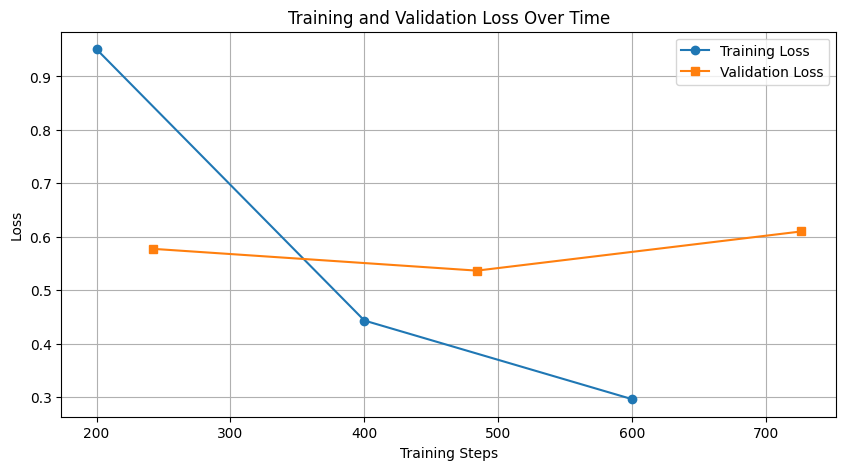

In [35]:
import matplotlib.pyplot as plt

# Initialize lists to collect data
train_steps = []
train_losses = []
eval_steps = []
eval_losses = []

# Parse log history
for entry in trainer.state.log_history:
    if "loss" in entry and "step" in entry:
        train_steps.append(entry["step"])
        train_losses.append(entry["loss"])
    elif "eval_loss" in entry and "step" in entry:
        eval_steps.append(entry["step"])
        eval_losses.append(entry["eval_loss"])

# Plot the losses
plt.figure(figsize=(10, 5))
plt.plot(train_steps, train_losses, label="Training Loss", marker='o')
plt.plot(eval_steps, eval_losses, label="Validation Loss", marker='s')
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Time")
plt.legend()
plt.grid(True)
plt.show()


In [39]:
# 🔮 Make predictions on the evaluation dataset
predictions = trainer.predict(eval_dataset)

# Extract true labels and predicted labels
y_pred = np.argmax(predictions.predictions, axis=1)
y_true = predictions.label_ids

# Confirm extraction worked
print("✅ Predictions and labels extracted!")


✅ Predictions and labels extracted!


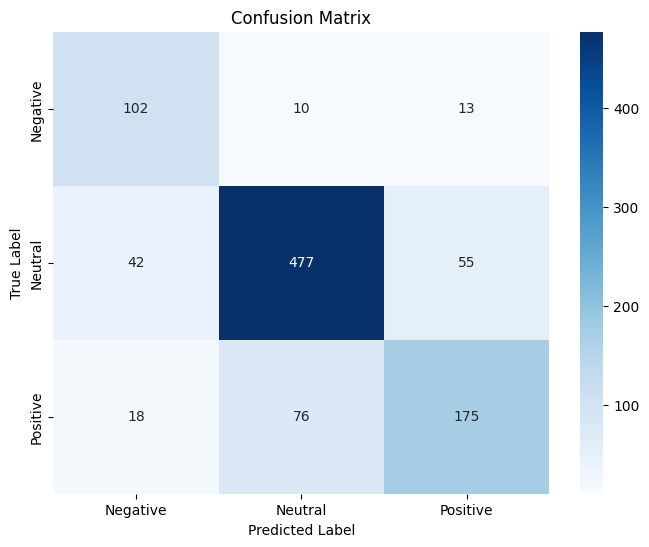


🧾 Classification Report:

              precision    recall  f1-score   support

    Negative       0.63      0.82      0.71       125
     Neutral       0.85      0.83      0.84       574
    Positive       0.72      0.65      0.68       269

    accuracy                           0.78       968
   macro avg       0.73      0.77      0.74       968
weighted avg       0.78      0.78      0.78       968



In [40]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Define label mapping
label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_map.values(), yticklabels=label_map.values())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("\n🧾 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=label_map.values()))


In [43]:
logging_dir="./logs",
logging_strategy="epoch",  # Or "steps"
logging_steps=200,         # Only relevant if strategy is "steps"


In [44]:
logging_dir="./logs",
logging_steps=200,


In [45]:
logging_strategy="epoch"


In [46]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./finbert_model",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",        # ✅ ADD THIS LINE
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=200,
    load_best_model_at_end=True
)


C:\Users\ashak\anaconda3\envs\qisk-latest\lib\site-packages\transformers\training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [48]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer
)

trainer.train()


C:\Users\ashak\AppData\Local\Temp\ipykernel_14696\2352452074.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,0.053200,1.416540
2,0.046100,1.351174
3,0.071900,1.369482


TrainOutput(global_step=726, training_loss=0.05708021237502085, metrics={'train_runtime': 2594.6217, 'train_samples_per_second': 4.476, 'train_steps_per_second': 0.28, 'total_flos': 763884030018816.0, 'train_loss': 0.05708021237502085, 'epoch': 3.0})

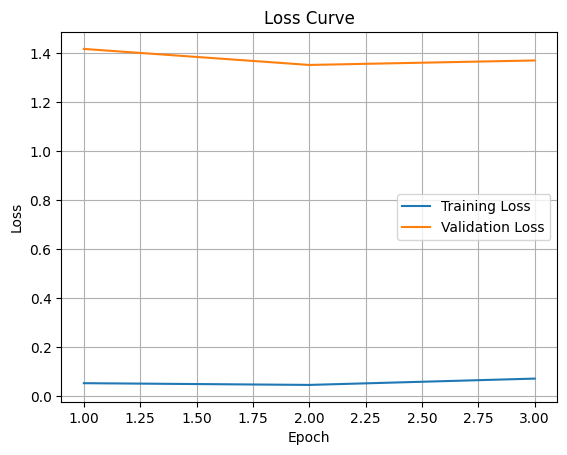

In [50]:
# Visualize training and validation loss curves
import matplotlib.pyplot as plt

# Extract loss values from trainer state
log_history = trainer.state.log_history

train_loss = [entry['loss'] for entry in log_history if 'loss' in entry]
eval_loss = [entry['eval_loss'] for entry in log_history if 'eval_loss' in entry]
steps = list(range(1, len(train_loss) + 1))

# Plot
plt.plot(steps, train_loss, label="Training Loss")
plt.plot(steps, eval_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#QAOA Optimization

In [69]:
from qiskit_optimization import QuadraticProgram

# Initialize the QUBO
qubo = QuadraticProgram()
qubo.binary_var("x0")  # Binary encoding for one hyperparameter (e.g., learning rate)
qubo.binary_var("x1")  # Another hyperparameter (e.g., batch size)

# Define the cost function (use sample dummy coefficients for now)
qubo.minimize(
    linear=[4.977e-08, -1.382e-08],
    quadratic={("x0", "x1"): 6.487e-08}
)

print(qubo.export_as_lp_string())


\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: CPLEX

Minimize
 obj: 0.000000049770 x0 - 0.000000013820 x1 + [ 0.000000129740 x0*x1 ]/2
Subject To

Bounds
 0 <= x0 <= 1
 0 <= x1 <= 1

Binaries
 x0 x1
End



In [70]:
from qiskit_algorithms import QAOA
from qiskit_algorithms.optimizers import COBYLA
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.primitives import Sampler

qaoa = QAOA(sampler=Sampler(), optimizer=COBYLA(), reps=1)
optimizer = MinimumEigenOptimizer(qaoa)

# Solve the problem
result = optimizer.solve(qubo)

# Output
print(f"🧠 Optimal binary solution: {result.x}")
print(f"📉 Minimum cost value: {result.fval}")


C:\Users\ashak\AppData\Local\Temp\ipykernel_14696\2121509647.py:6: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  qaoa = QAOA(sampler=Sampler(), optimizer=COBYLA(), reps=1)


🧠 Optimal binary solution: [0. 1.]
📉 Minimum cost value: -1.382e-08


In [72]:
# Binary to actual values
# x0: learning rate → 0: 2e-5, 1: 3e-5
# x1: batch size     → 0: 16,   1: 32

binary_solution = [0, 1]  # From QAOA

learning_rate = 2e-5 if binary_solution[0] == 0 else 3e-5
batch_size = 16 if binary_solution[1] == 0 else 32

print("🔧 Optimized Hyperparameters:")
print(f"📈 Learning Rate: {learning_rate}")
print(f"📦 Batch Size: {batch_size}")


🔧 Optimized Hyperparameters:
📈 Learning Rate: 2e-05
📦 Batch Size: 32


In [73]:
from transformers import TrainingArguments

training_args_qaoa = TrainingArguments(
    output_dir="./finbert_qaoa_optimized",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=learning_rate,  # From QAOA
    per_device_train_batch_size=batch_size,  # From QAOA
    per_device_eval_batch_size=batch_size,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs_qaoa",
    logging_steps=200,
    load_best_model_at_end=True
)

trainer_qaoa = Trainer(
    model=model,
    args=training_args_qaoa,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
)

trainer_qaoa.train()


C:\Users\ashak\anaconda3\envs\qisk-latest\lib\site-packages\transformers\training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\ashak\AppData\Local\Temp\ipykernel_14696\1478900884.py:17: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_qaoa = Trainer(


Epoch,Training Loss,Validation Loss
1,No log,0.308818
2,0.290600,0.363508
3,0.290600,0.372792


TrainOutput(global_step=366, training_loss=0.19492851319860238, metrics={'train_runtime': 1255.6236, 'train_samples_per_second': 9.261, 'train_steps_per_second': 0.291, 'total_flos': 384063366939840.0, 'train_loss': 0.19492851319860238, 'epoch': 3.0})

In [74]:
# Predict with QAOA-optimized model
predictions_qaoa = trainer_qaoa.predict(eval_dataset)
y_pred_qaoa = np.argmax(predictions_qaoa.predictions, axis=1)
y_true_qaoa = predictions_qaoa.label_ids

# Confusion matrix + classification report
from sklearn.metrics import classification_report, confusion_matrix

print("\n📊 Classification Report (QAOA):\n")
print(classification_report(y_true_qaoa, y_pred_qaoa, target_names=["Negative", "Neutral", "Positive"]))



📊 Classification Report (QAOA):

              precision    recall  f1-score   support

    Negative       0.86      0.86      0.86       116
     Neutral       0.91      0.94      0.92       577
    Positive       0.87      0.81      0.84       277

    accuracy                           0.89       970
   macro avg       0.88      0.87      0.87       970
weighted avg       0.89      0.89      0.89       970



In [ ]:
# VQE

In [84]:
from qiskit_optimization import QuadraticProgram

# 1. Define your QUBO problem (2 binary variables)
qubo = QuadraticProgram()
qubo.binary_var("x0")  # e.g., learning rate
qubo.binary_var("x1")  # e.g., batch size

# 2. Set up the objective function
#   Minimizing: 4.977e-08*x0 + (-1.382e-08)*x1 + 6.487e-08*x0*x1
#   (Same as used for QAOA)
qubo.minimize(
    linear=[4.977e-08, -1.382e-08],
    quadratic={(0, 1): 6.487e-08}
)

print("✅ QUBO defined!")


✅ QUBO defined!


In [85]:
from qiskit_optimization.translators import to_ising

# Convert to Ising operator (PauliSumOp) + offset
hamiltonian, offset = to_ising(qubo)

print("Hamiltonian:", hamiltonian)
print("Offset:", offset)


Hamiltonian: SparsePauliOp(['IZ', 'ZI', 'ZZ'],
              coeffs=[-4.11025e-08+0.j, -9.30750e-09+0.j,  1.62175e-08+0.j])
Offset: 3.41925e-08


In [96]:
from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import COBYLA
from qiskit.circuit.library import TwoLocal
from qiskit.primitives import Estimator

# Create a 2-qubit ansatz
ansatz = TwoLocal(num_qubits=2, rotation_blocks='ry', entanglement_blocks='cz', reps=1)

# Create a VQE instance using COBYLA optimizer + Estimator
vqe = VQE(ansatz=ansatz, optimizer=COBYLA(), estimator=Estimator())

# Compute the minimum eigenvalue for our Hamiltonian
vqe_result = vqe.compute_minimum_eigenvalue(operator=hamiltonian)
vqe_energy = vqe_result.eigenvalue.real + offset  # Add offset to get QUBO cost

print("VQE raw energy (no offset):", vqe_result.eigenvalue.real)
print("VQE offset:", offset)
print("VQE final cost value:", vqe_energy)

print("Optimal parameters:", vqe_result.optimal_parameters)


C:\Users\ashak\AppData\Local\Temp\ipykernel_14696\676223333.py:10: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  vqe = VQE(ansatz=ansatz, optimizer=COBYLA(), estimator=Estimator())


VQE raw energy (no offset): -4.801249643285854e-08
VQE offset: 3.41925e-08
VQE final cost value: -1.3819996432858538e-08
Optimal parameters: {ParameterVectorElement(θ[0]): np.float64(1.864983536550108), ParameterVectorElement(θ[1]): np.float64(3.1415027678536243), ParameterVectorElement(θ[2]): np.float64(1.8648767296936528), ParameterVectorElement(θ[3]): np.float64(-0.0009767132677016436)}


In [95]:
import numpy as np
from qiskit.quantum_info import Statevector
from qiskit.primitives import StatevectorEstimator

# 1. Build final circuit by binding angles from vqe_result
bound_circuit = ansatz.assign_parameters(vqe_result.optimal_parameters)

# 2. Evaluate final state using StatevectorEstimator
sve = StatevectorEstimator()
job = sve.run([bound_circuit])
sv = job.result().values[0]  # This is the amplitude vector

print("Statevector amplitudes:", sv)

# 3. Convert to a Statevector object for probabilities
final_sv = Statevector(bound_circuit)
probs_dict = final_sv.probabilities_dict()

# 4. Get the bitstring with highest amplitude
top_state = max(probs_dict.items(), key=lambda x: x[1])
bitstring = top_state[0]

print("Most probable solution (bitstring):", bitstring)


CircuitError: 'Cannot bind parameters (θ[0], θ[1], θ[2], θ[3]) not present in the circuit.'

In [ ]:
# GORK TRY

In [89]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import TwoLocal
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import Estimator  # Use Estimator instead of StatevectorEstimator
from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import SLSQP

# Define the Hamiltonian (e.g., for H2 molecule)
H2_op = SparsePauliOp.from_list([
    ("II", -1.052373245772859),
    ("IZ", 0.39793742484318045),
    ("ZI", -0.39793742484318045),
    ("ZZ", -0.01128010425623538),
    ("XX", 0.18093119978423156),
])

# Create the ansatz
ansatz = TwoLocal(2, rotation_blocks=["ry", "rz"], entanglement_blocks="cz", reps=1)

# Set up the optimizer
optimizer = SLSQP()

# Initialize the estimator
estimator = Estimator()  # Replace StatevectorEstimator with Estimator

# Run VQE
vqe = VQE(estimator=estimator, ansatz=ansatz, optimizer=optimizer)
result = vqe.compute_minimum_eigenvalue(operator=H2_op)
print("Minimum eigenvalue:", result.eigenvalue)

C:\Users\ashak\AppData\Local\Temp\ipykernel_14696\1283606262.py:24: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()  # Replace StatevectorEstimator with Estimator


Minimum eigenvalue: -1.836966666852295


In [91]:
def objective_function(params):
    # Bind parameters to the ansatz
    bound_circuit = ansatz.assign_parameters(params)
    # Run the estimator with the bound circuit and Hamiltonian
    job = estimator.run([(bound_circuit, H2_op)])
    result = job.result()
    # Extract the expectation value (energy)
    energy = result[0].data.evs  # Corrected: no [0] needed
    return energy

In [92]:
def objective_function(params):
    bound_circuit = ansatz.assign_parameters(params)
    job = estimator.run([(bound_circuit, H2_op)])
    result = job.result()
    evs = result[0].data.evs
    print("Type of evs:", type(evs))
    print("Value of evs:", evs)
    energy = evs
    return energy

In [93]:
import numpy as np
from scipy.optimize import minimize
from qiskit.primitives import StatevectorEstimator

# Assume ansatz, H2_op, and estimator are defined elsewhere
# ansatz: Quantum circuit with parameters
# H2_op: Hamiltonian (SparsePauliOp)
# estimator: StatevectorEstimator instance

def objective_function(params):
    bound_circuit = ansatz.assign_parameters(params)
    job = estimator.run([(bound_circuit, H2_op)])
    result = job.result()
    energy = result[0].data.evs  # Fixed line
    return energy

# Initial parameters
initial_params = np.zeros(ansatz.num_parameters)

# Perform optimization using SLSQP
optimizer = minimize(objective_function, initial_params, method="SLSQP")

# Output the results
print("Optimization result:", optimizer)

Optimization result:  message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.0636533500290943
       x: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
            0.000e+00  0.000e+00  0.000e+00]
     nit: 1
     jac: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
            0.000e+00  0.000e+00  0.000e+00]
    nfev: 9
    njev: 1


NameError: name 'bitstring' is not defined